Câu 9: Viết một chương trình Python để tính gần đúng diện tích của miền được giới hạn bởi hai đường cong:

$$
y = \sqrt{x} \quad \text{và} \quad y = x
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import uniform

k = uniform(0,1)
x = k.rvs(size = 1000000)
y = k.rvs(size = 1000000)
s = (y>=x) & (y<=np.sqrt(x))
area = s.mean()
print("Diện tích của miền giới hạn là: ", area)
print("sai khác so với giá trị giải tích là: ", abs(area - 2/3 + 1/2))

Diện tích của miền giới hạn là:  0.166639
sai khác so với giá trị giải tích là:  2.7666666666648077e-05


Câu 10: Viết một chương trình Python để tính gần đúng tích phân hai lớp của hàm:

$$
z = x^2 + y^2
$$

trên các miền:

a)
$$
D_1 = \{(x,y) \mid x^2 + y^2 \le 1\}
$$

b)
$$
D_2 = [0,1] \times [0,1]
$$




In [4]:
# câu a
k = uniform(-1,1)
x = k.rvs(size = 1000000)
y = k.rvs(size = 1000000)
s = (x**2 + y**2<=1)
area = sum((x**2 + y**2)[s])/1000000 * 4
print("Diện tích của miền giới hạn câu a là: ", area)
# câu b
k = uniform(0,1)
x = k.rvs(size = 1000000)
y = k.rvs(size = 1000000)
area = sum((x**2 + y**2))/1000000
print("Diện tích của miền giới hạn câu b là: ", area)

Diện tích của miền giới hạn câu a là:  1.5696431330001839
Diện tích của miền giới hạn câu b là:  0.6664578337331989


Câu 11: Tính xác suất P(-1<X<2) với X~N(1,1) (N là phân phối chuẩn) bằng 2 cách: Sử dụng thư viện của python và tính gần đúng bằng phương pháp Monte-Carlo.


In [5]:
#dùng thư viện python
from scipy.stats import norm
k = norm(1,1)
print("P(-1<x<2): ", k.cdf(2)-k.cdf(-1))

P(-1<x<2):  0.8185946141203637


In [6]:
#dùng monte carlo
k = np.random.normal(1,1,10000000)
s = (k>-1) & (k < 2)
print(s.mean())

0.8185544


Câu 12: Viết chương trình sinh số ngẫu nhiên 1, 2, 3, 4 với xác suất theo thứ tự là 0.1, 0.4, 0.3, 0.2.
Viết chương trình chứng minh lại kết quả sinh số trên bằng phương pháp Monte-Carlo.

HD: So sánh với kết quả từ python bằng phương thức random.choices (ds giá trị, ds trọng số)[0]


In [14]:
val = [1, 2, 3, 4]
p = [0.1, 0.4, 0.3, 0.2]
k = np.random.choice(val, 1000000,p= p)
k = pd.Series(k)
print(k.value_counts(normalize = True).sort_index())

1    0.099991
2    0.400157
3    0.300095
4    0.199757
Name: proportion, dtype: float64


Câu 13: Tính gần đúng hàm Laplace ứng với phân phối chuẩn N(0,1). So sánh với kết quả lấy từ python trong thư viện scipy.stats:

HD: Phương thức: stats.norm.cdf(chặn, trung bình=0, phương sai=1) cho xác suất từ 0 đến chặn của phân phối chuẩn.

Ghi chú: Muốn cải thiện độ chính xác thì phải thực hiện mô phỏng nhiều lần và lấy kết quả trung bình


In [18]:
x = 1
cdfSum = []
for i in range(51):
  k = np.random.normal(0,1,10000)
  s = (k < x)
  cdfSum.append(s.mean())
cdfSum = np.array(cdfSum)
print("cdf xấp xỉ bằng monte carlo là: ", cdfSum.mean())
print("cdf tính bằng thư viện là: ", norm.cdf(x))

cdf xấp xỉ bằng monte carlo là:  0.8413921568627452
cdf xấp xỉ bằng thư viện là:  0.8413447460685429


Câu 14: Xét trò chơi người A tung xúc xắc với các mặt từ 1-100. Nếu A được từ 1-51 thì nhà cái thắng, còn từ 52-100 thì người A thắng. Giả sử A cá 1 USD cho 1 game. Viết chương trình mô phỏng số tiền A thu về sau 10 lần cá, 100 lần cá, sau 10.000 lần cá. So sánh kết quả mô phỏng với kết quả tính theo lý thuyết xác suất (TB = -1/50 USD)


In [43]:
from scipy.stats import randint
def rand(n):
  roll = np.random.randint(1,101, n)
  profit = np.where(roll >= 52, 1, -1 )
  sum = np.sum(profit)
  return sum
for i in [10, 100, 10000]:
  total = rand(i)
  print(f"Tổng doanh thu sau {i} ván là {total}")
  print(f"Doanh thu trung binh sau chơi {i} ván là {total/i}")

Tổng doanh thu sau 10 ván là 0
Doanh thu trung binh sau chơi 10 ván là 0.0
Tổng doanh thu sau 100 ván là -8
Doanh thu trung binh sau chơi 100 ván là -0.08
Tổng doanh thu sau 10000 ván là -274
Doanh thu trung binh sau chơi 10000 ván là -0.0274


In [44]:
print("=> sau càng nhiều ván thì càng gần với giá trị lý thuyết")

=> sau càng nhiều ván thì càng gần với giá trị lý thuyết


Câu 15: Giả sử một người đặt a đồng vào ô “cua” (một trong 6 ô có tên là: Bầu, cua, cá, gà, tôm cọp). Nhà cái sẽ tung 3 hạt  bầu cua. Nếu được i (i>0) mặt “cua” thì người chơi sẽ được thưởng i lần a đồng, còn nếu không được mặt “cua” nào thì người chơi bị mất a đồng đã đặt. Dùng mô phỏng Monte-Carlo để đánh giá tính công bằng của trò chơi này.


Doanh thu sau 100000 lượt chơi là: -82430
Lợi nhuận trung bình/game: -0.8243
Có thể thấy đây là 1 trò chơi không công bằng


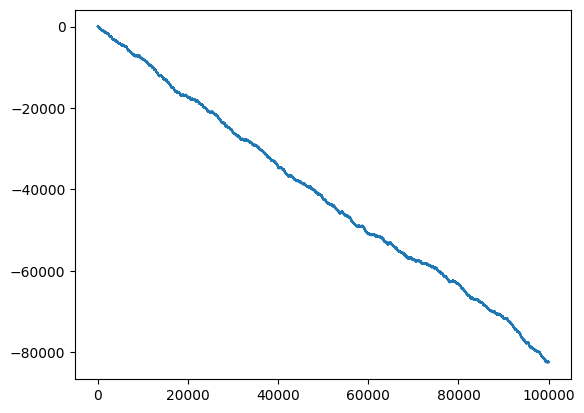

In [90]:
import numpy as np

def play():
    roll = np.random.randint(1,7,3)
    k = np.sum(roll == 1)  #mặt 'Cua'
    return k

n = 100000
a = 10  # số tiền thắng mỗi mặt Cua
profit = 0
l = []
for _ in range(n):
    k = play()
    if k > 0:
        profit += k * a
    else:
        profit -= a
    l.append(profit)
print(f"Doanh thu sau {n} lượt chơi là: {profit}")
print(f"Lợi nhuận trung bình/game: {profit/n:.4f}")
plt.plot(np.arange(n),l)
print("Có thể thấy đây là 1 trò chơi không công bằng")


Câu 16: Mô phỏng quá trình Wiener (chuyển động Brown)

Xét quá trình Wiener $W(t)$, thỏa:

$W(0) = 0$, $W(t)$ liên tục theo thời gian, và $W(t) - W(s) \sim \mathcal{N}(0, t-s)$ với $t \ge s$.

- Viết chương trình mô phỏng quỹ đạo của quá trình Wiener $W(t)$.
- Trình bày $k = 3$ quỹ đạo trên cùng một đồ thị.



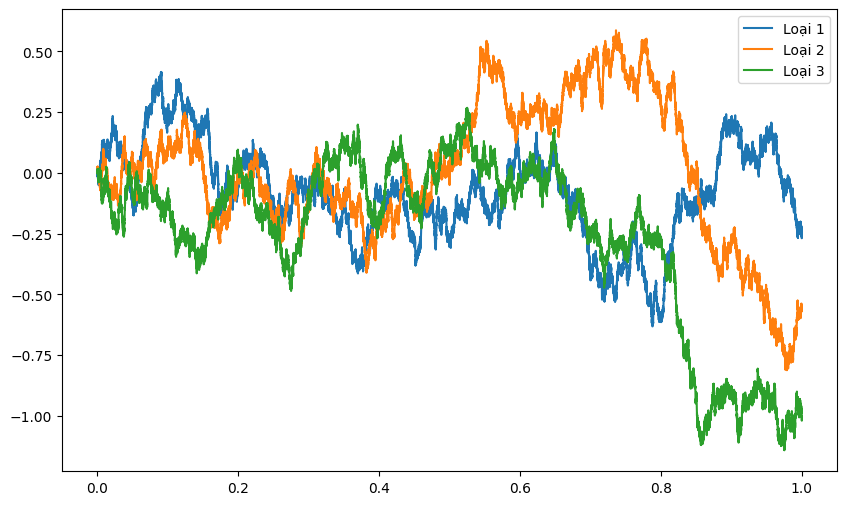

In [104]:
def brown(t, n):
  k = np.linspace(0, t, n + 1)
  dw = np.random.normal(0, np.sqrt(t/n), n)
  w = np.zeros(n+1)
  w[1:] = np.cumsum(dw)
  return k,w
t1, w1 = brown(1, 100000)
t2, w2 = brown(1, 100000)
t3, w3 = brown(1, 100000)
plt.figure(figsize = (10,6))
plt.plot(t1, w1)
plt.plot(t2, w2)
plt.plot(t3, w3)
plt.legend(['Loại 1', 'Loại 2', 'Loại 3'])